In [62]:
# db Ï†ëÏÜç 
# Ïö∞ÏÑ† db Ï†ëÏÜç ÌõÑ ÏõêÏãú Îç∞Ïù¥ÌÑ∞ Î∞õÍ∏∞
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import DB_PASS
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler

# PostgreSQL Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞ ÏÑ§Ï†ï
username = 'psh0826'  # ÏÇ¨Ïö©Ïûê Ïù¥Î¶Ñ
password = DB_PASS  # ÎπÑÎ∞ÄÎ≤àÌò∏
host = 'localhost'  # Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÏÑúÎ≤Ñ Ï£ºÏÜå
port = '5432'  # Ìè¨Ìä∏ Î≤àÌò∏
dbname = 'youtube_videos'  # Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïù¥Î¶Ñ
connection_string = f"postgresql://{username}:{password}@{host}:{port}/{dbname}"

# Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ Ïó∞Í≤∞ ÏóîÏßÑ ÏÉùÏÑ±
engine = create_engine(connection_string)

# SQL ÏøºÎ¶¨ Ïã§Ìñâ Î∞è Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò
query = "SELECT * FROM video_datas;"

# Îç∞Ïù¥ÌÑ∞Î•º Í∞ÄÏ†∏Ïò¨ ÌÖåÏù¥Î∏îÎ™Ö
df = pd.read_sql(query, engine)

# Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
# info() ÏóêÏÑú ÏàòÏπòÌòï / Î¨∏ÏûêÏó¥ Îì±ÏùÑ Ï≤¥ÌÅ¨ÌïúÎã§.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2391 entries, 0 to 2390
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   video_id      2391 non-null   object        
 1   title         2391 non-null   object        
 2   time          2391 non-null   datetime64[ns]
 3   views         2391 non-null   int64         
 4   likes         2391 non-null   int64         
 5   dislikes      2391 non-null   int64         
 6   comments_cnt  2391 non-null   int64         
 7   comments      2391 non-null   object        
 8   query         2391 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 168.2+ KB
None


In [56]:

# ÎÑêÍ∞í ÌôïÏù∏
df.isnull()

# ÎÑêÍ∞í Í∞úÏàò ÌôïÏù∏
df.isnull().sum()
print(df.isna().sum())

# isna Îäî ÏãúÎ¶¨Ïñº Í∞ùÏ≤¥ÏóêÎèÑ Ï†ÅÏö©Îê®.
df['video_id'].isna()
print(df['video_id'].isna().sum())


video_id        0
title           0
time            0
views           0
likes           0
dislikes        0
comments_cnt    0
comments        0
query           0
dtype: int64
0


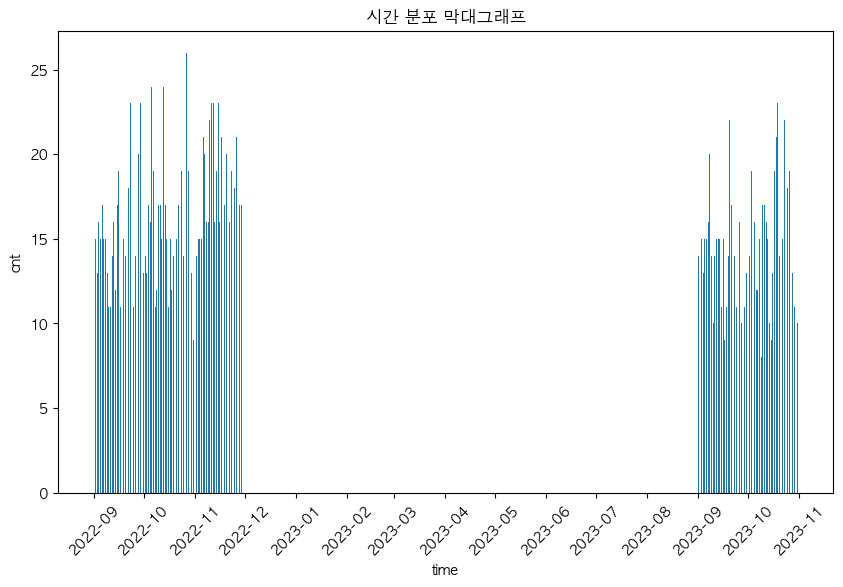

In [50]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'AppleGothic'

# ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ Ï°∞ÏÇ¨
df.describe()

# ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ Ï§ëÏóêÏÑú Ïù¥ÏÇ∞Ìòï Îç∞Ïù¥ÌÑ∞Í∞Ä ÏïÑÎãàÍ±∞ÎÇò, Î≤îÏúÑÌòïÏù¥Í±∞ÎÇò, ÏßÄÍ∏à Ï≤òÎüº ÏãúÍ∞ÑÏù¥ÎÇò ÎÇ†Ïßú Í∞íÏù∏ÏßÄ ÌôïÏù∏Ìï¥Î≥∏Îã§.
# time Ïª¨Îüº Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
# print(df['time'])

# Ï†ïÎ†¨
# df['time'].dtypes
# print(pd.to_datetime(df['time'])) # ÌïÑÏöîÌïòÎ©¥ ÎÇ†ÏßúÌÉÄÏûÖÏúºÎ°ú Î∞îÍæ∏Í≥†
# df['time'].sort_values()
# Ïù¥Í±∏Î°ú Ï†ïÎ†¨Ïù¥ ÏïàÎêòÎ©¥ Î∞ëÏóêÏÑú ÏãúÎ¶¨Ï¶àÎ°ú ÎΩëÏïÑÏÑú .sort_index()Î°ú Ï†ïÎ†¨Ìï¥ÎèÑ Îê®

# ÏãúÍ∞ÑÎåÄ ÏãúÍ∞ÅÌôî 

# ÎÇ†ÏßúÎ•º ÏãúÍ∞ÑÍπåÏßÄÎßå ÎÇòÏò§Í≤å ÌïòÍ∏∞
# ÎÇ†ÏßúÍπåÏßÄÎßå Î∂ÑÎ¶¨Ìï¥ÏÑú Î∂ÑÌè¨ Ï°∞ÏÇ¨
date_series = df['time'].dt.strftime('%Y-%m-%d')
# print(date_series)

# ÏãúÍ∞ÑÎåÄÎ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
time_series_cnt = date_series.value_counts().sort_index()
# print(time_series_cnt)

# Ïù∏Îç±Ïä§(ÎÇ†Ïßú Î¨∏ÏûêÏó¥)Î•º datetimeÏúºÎ°ú Î≥ÄÌôò
# ÎÇ†ÏßúÌòïÌÉúÎ°ú Î∞îÍøîÏ§òÏïº Î∞ëÏóê xÏ∂ï ÎÇ†ÏßúÌòï Ìè¨Îß∑ÌÑ∞Í∞Ä ÏûëÎèôÌï®
time_series_cnt.index = pd.to_datetime(time_series_cnt.index)

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10,6))
plt.bar(time_series_cnt.index, time_series_cnt.values, width = 0.5)

# xÏ∂ï ÏÑ§Ï†ï (ÎßåÏïΩ ÎßâÎåÄ Í∑∏ÎûòÌîÑÎ•º Îçî Îö±Îö±ÌïòÍ≤å Ìï†Î†§Î©¥ Ï£ºÎ≥ÑÎ°ú ÏßëÍ≥ÑÎ•º Îã§Ïãú ÌïòÍ±∞ÎÇò Ìï¥ÏÑú xÏ∂ïÏùò Î≤îÏúÑÎ•º Ìôï Ï§ÑÏó¨ÏïºÌï®)
plt.xticks(ticks=time_series_cnt.index, labels=time_series_cnt.index.strftime('%Y-%m'), rotation=45)

plt.xlabel('time')
plt.ylabel('cnt')
plt.title('ÏãúÍ∞Ñ Î∂ÑÌè¨ ÎßâÎåÄÍ∑∏ÎûòÌîÑ')

# xÏ∂ï ÎùºÎ≤® ÏÑ§Ï†ï
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # ÏõîÎ≥ÑÎ°ú Î°úÏºÄÏù¥ÌÑ∞ ÏÑ§Ï†ï
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 'ÎÖÑ-Ïõî' ÌòïÏãùÏúºÎ°ú Ìè¨Îß§ÌÑ∞ ÏÑ§Ï†ï

plt.show()

In [55]:
# ÏúÑ time Ïª¨ÎüºÏùò Î∂ÑÌè¨Î•º Î≥¥Î©¥, 22ÎÖÑ 9Ïõî Î∂ÄÌÑ∞ 11Ïõî, 23ÎÖÑ 9Ïõî Î∂ÄÌÑ∞ 10ÏõîÍπåÏßÄÏùò Îç∞Ïù¥ÌÑ∞ÏûÑÏùÑ ÏïåÏàòÏûàÎã§.
# Ïù¥Îäî Ï≤òÏùåÎ∂ÄÌÑ∞ ÏàòÏßëÌï†Îïå Í∞ÄÏùÑ Ìå®ÏÖò Ìä∏ÎûúÎìúÎ•º ÏïåÏïÑÎ≥¥Í∏∞ ÏúÑÌï®Ïù¥ÏóàÎã§. 

# ÏùºÎ≥ÑÎ°ú ÏàòÏßëÎêú ÎπÑÎîîÏò§ Í∞úÏàòÎ•º Î≥¥Î©¥, 
daily_counts = df['time'].dt.to_period('D').value_counts().sort_index()

# ÏùºÎ≥Ñ ÌèâÍ∑† Í≥ÑÏÇ∞
monthly_avg = daily_counts.mean()
print('Ïùº ÌèâÍ∑† ÎπÑÎîîÏò§ Í∞úÏàò: ', monthly_avg)

# ÏùºÎ≥Ñ ÎèôÏòÅÏÉÅÏùÄ ÌèâÍ∑† 15Í∞ú Ï†ïÎèÑ ÏûàÏóàÎã§. 




ÏõîÎ≥Ñ ÌèâÍ∑† ÎπÑÎîîÏò§ Í∞úÏàò:  15.730263157894736


/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 769 (\N{COMBINING ACUTE ACCENT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 10083 (\N{HEAVY HEART EXCLAMATION MARK ORNAMENT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127810 (\N{FALLEN LEAF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/tensor/lib/python3.9/si

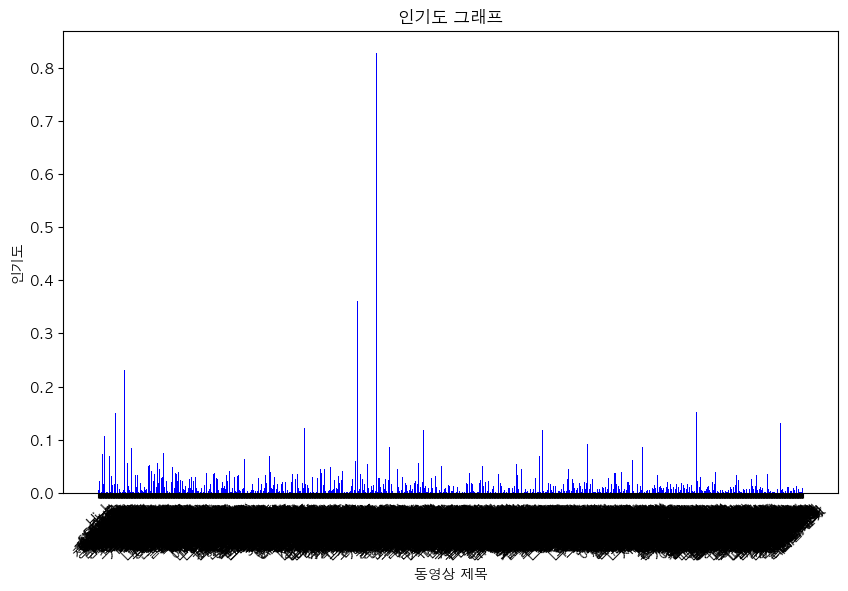

In [68]:
# Í∞ÄÏû• Ïù∏Í∏∞ ÎßéÏùÄ ÎèôÏòÅÏÉÅ ÏïåÏïÑÎ≥¥Í∏∞
# Ïó¨Í∏∞ÏÑú Ïù∏Í∏∞Îäî ÎåìÍ∏ÄÏàòÏôÄ ÏãúÏ≤≠ÏûêÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌïúÎã§.

# Ï¢ãÏïÑÏöîÏôÄ ÎåìÍ∏ÄÏàò Ï†ïÍ∑úÌôî
scaler = MinMaxScaler()
df['likes_normalized'] = scaler.fit_transform(df[['likes']])
df['comments_cnt_normalized'] = scaler.fit_transform(df[['comments_cnt']])

# Ïù∏Í∏∞ÎèÑ Í≥ÑÏÇ∞ (Ï†ïÍ∑úÌôîÎêú Ï¢ãÏïÑÏöîÏôÄ ÎåìÍ∏ÄÏàòÏùò ÌèâÍ∑†)
df['popularity'] = df[['likes_normalized', 'comments_cnt_normalized']].mean(axis=1)

# Ï†úÎ™©Í∏∏Ïù¥ Ï°∞Ï†ï
titles = df['title'].str[0:5]

# ÎßâÎåÄ Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
plt.figure(figsize=(10, 6))
plt.bar(titles, df['popularity'], color='blue')
plt.xlabel('ÎèôÏòÅÏÉÅ Ï†úÎ™©')
plt.ylabel('Ïù∏Í∏∞ÎèÑ')
plt.title('Ïù∏Í∏∞ÎèÑ Í∑∏ÎûòÌîÑ')
plt.xticks(rotation=45)
plt.show()






In [69]:
# Ïù∏Í∏∞ÎèÑ top 20 Ï°∞ÏÇ¨
# Ïù∏Í∏∞ÎèÑÎ•º Í∏∞Ï§ÄÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ï†ïÎ†¨
top_videos = df.sort_values(by='popularity', ascending=False, ).head(100)

# ÏÉÅÏúÑ 100Í∞ú ÎèôÏòÅÏÉÅÏùò ÌÉÄÏù¥ÌãÄ Ï∂îÏ∂ú
top_titles = top_videos['title']

# Í≤∞Í≥º Ï∂úÎ†•
print(top_titles)




868               Î™∏Ïóê Ïä§ÌîÑÎ†àÏù¥Î•º ÎøåÎ¶¨Ïûê 10Î∂Ñ ÎßåÏóê ÏôÑÏÑ±Îêú ÎìúÎ†àÏä§Í∞Ä ÏûàÎã§?
932                    ÏßÑÏßú Î∂ÄÏûêÎì§Ïù¥ Î°§Î†âÏä§ Í±∞Î•¥Îäî Ïù¥Ïú† (ft.Î©îÏ¢ÖÏ≤†)
1238         üòáÏàòÎä•Ïù¥ ·ÑÅ·Ö≥·áÄÎÇòÍ≥† ÎÇú Îí§ ·ÑÄ·Ö©3·ÑÉ·Ö≥·ÜØ·Ñã·Ö¥ ·ÑÜ·Ö©·Ñâ·Ö≥·Ü∏„Öã„Öã„Öã„Öã„Öã„Öã„Öã„Öã
1084                         ÏßÄÍ∏à ÏÇ¨Í∏∞Ïóî ÏïÑÍπù vs ÏßÄÍ∏à ÏÇ¨ÎèÑ Í¥úÏ∏ä
803                          Í∏àÏàòÏ†Ä Ïó∞ÎåÄÏÉù Î©îÏ¢ÖÏ≤†Ïùò Ï≤úÎßåÏõêÏßúÎ¶¨ Ï∞©Ïû•
                           ...                    
775         Í≤®Ïö∏Ïò∑ ÏÇ¨Í∏∞Ï†ÑÏóê Î≥¥Ïûê! Í≤®Ïö∏ Í∞ÄÏû• Î®ºÏ†Ä ÏÇ¨ÏïºÌïòÎäî Ïò∑Îì§ [Ìå®ÏÖòÏö∞ÏÑ†ÏàúÏúÑ]
43      Í∞ÄÏùÑÏóê Ïù¥ "4Í∞ÄÏßÄ"Îßå ÏûàÏúºÎ©¥ Ïò∑ Í±±Ï†ï ÎÅù!üçÇÍ∞ÄÏùÑ ÌïÑÏàò Ïä§ÌÉÄÏùº [ÌîÑÎ°†Ìä∏Î°úÏö∞]
453         ÎÇ®ÏûêÎùºÎ©¥ ÌïòÎÇòÏØ§ ÏûàÏñ¥ÏïºÌï† ‚ÄúÏó≠ÎåÄÍ∏â‚Äù ÎãàÌä∏ ÎΩëÏïòÎã§ [ÏΩúÎùºÎ≥¥ÏôïEP.11]
165           Ï†ú2Ïùò Ï†ÑÏÑ±Í∏∞ üìà ÌïúÎèôÏïà Ï£ºÏ∂§ÌñàÎã§Í∞Ä ÏµúÍ∑º Îã§Ïãú Îñ°ÏÉÅÌïú Ìå®ÏÖò ÏïÑÏù¥ÌÖú
714                                 Ïù¥ÏÑ±Ïù¥ Í∞ÄÏû• Ï¢ãÏïÑÌïòÎäî Ïã†Î∞ú
Name

In [71]:
# Ïù∏Í∏∞ÎèÑ ÌèâÍ∑† Ïù¥ÏÉÅÏπò ÎêòÎäî ÏòÅÏÉÅÎì§ Ï†úÎ™© Îã§ Í∏ÅÏñ¥ÏôÄÏÑú ÌÇ§ÏõåÎìú Î∂ÑÏÑùÌïòÍ∏∞

# Îã§Ïãú top 100Í∞ú Íµ¨ÌïòÍ∏∞
top_videos = df.nlargest(20, 'populrity')

# ÏÉÅÏúÑ 20Í∞ú ÎèôÏòÅÏÉÅÏùò ÌÉÄÏù¥ÌãÄ Ï∂îÏ∂ú
top_titles = top_videos['title']

# Í≤∞Í≥º Ï∂úÎ†•
print(top_titles)



KeyError: 'populrity'